###Ham 1 bien

Solution x1 = -4.141831, cost = 21.362764, obtained after 0 iterations
Solution x2 = 3.858169, cost = 11.601433, obtained after 0 iterations


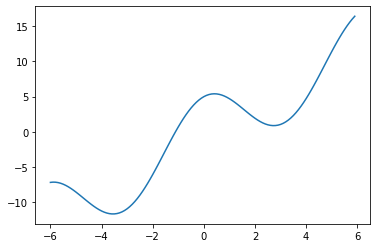

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import math
#x**2 + 5 * sin(x)
#tinh dao ham
def grad(x):
  return 2*x + 5*np.cos(x)
#tinh gia tri ham so
def cost(x):
  return x**2 + 5*np.sin(x)
#tìm điểm dừng
def myGD1(eta, x0):
  x = [x0]
  for it in range(100):
    x_new = x[-1] - eta * grad(x[-1])
    if abs(cost(x_new)) < 1e-3:
      break
    x.append(x_new)
    return (x, it)
#diem khoi tao
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))
#x = -5 hội tụ nhanh hơn vì gần với 
x = np.arange(-6, 6, 0.1)
y = grad(x)
plt.plot(x, y)

###Ham nhieu bien

Solution found by formula: w =  [[3.9956602  3.00564884]]


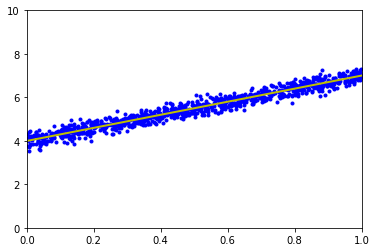

In [ ]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt
#tao 1000 diem gan với đường thẳng y = 4 + 3x
X = np.random.rand(1000,1) #random.rand: Giá trị ngẫu nhiên trong một hình dạng cho trước.
y = 4 + 3*X + .2* np.random.randn(1000,1) #Random.randn: Trả lại một mẫu (hoặc các mẫu) từ phân phối "chuẩn thông thường".
#xây dựng Xbar
one = np.ones((X.shape[0], 1)) #tạo 1 numpy array với các phần tử là 1
Xbar = np.concatenate((one, X), axis = 1) #kết hợp 2 hoặc nhiều chuỗi

A = np.dot(Xbar.T, Xbar) #.T: ma trận chuyển vị, dot: nhân 
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b) #pinv: Tính nghịch đảo của ma trận
print('Solution found by formula: w = ',w_lr.T)
#hiển thị kết quả
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True) 
#np.linspace: Trả về các số cách đều nhau trong một khoảng thời gian xác định.
#start = 0, end = 1, num = 2: số lượng mẫu để tạo
y0 = w_0 + w_1*x0
#vẽ
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()
# đường thẳng màu vàng y ~ y = 4 + 2.998x

In [ ]:
#Viết đạo hàm và hàm mất mát
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;
#kiểm tra đạo hàm và có thể áp dụng với một hàm số (của một vector) bất kỳ với cost và grad đã tính ở phía trên
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w) #Trả về một mảng các số không có cùng hình dạng và kiểu như một mảng đã cho.
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))


Checking gradient... True


In [ ]:
#tìm điểm dừng
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.01081355 2.97764382]] ,
after 49 iterations.
